### ANOVA

Types:  
- 1way ANOVA    
- 2way ANOVA  
     - Tukey HSD

- Chi-Square Test

#### 1 Way ANOVA

Note:  When we're doing the T test or Anova on two groups both give you the same results but not the methodology is same.

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
from statsmodels.formula.api import ols #--ordinary least squares
from statsmodels.stats.anova import anova_lm #--linear model
from bioinfokit.analys import stat #--This is for Tukey HSD
from scipy.stats import chi2_contingency

In [1]:
import pandas as pd

data = {
    "Before": [
        6.76, 4.8, 7.49, 5.05, 3.91, 6.17, 7.67, 7.34, 5.13,   # A
        6.42, 6.56, 8.43, 8.05, 5.77, 6.77, 6.44, 6.85, 5.73   # B
    ],
    "After4weeks": [
        6.2, 4.27, 7.12, 4.63, 3.7, 5.56, 7.11, 6.84, 4.52,    # A
        5.83, 5.83, 7.71, 7.25, 5.31, 6.15, 5.59, 6.4, 5.13    # B
    ],
    "After8weeks": [
        6.13, 4.15, 7.05, 4.67, 3.66, 5.51, 6.96, 6.82, 4.45,  # A
        5.75, 5.71, 7.67, 7.1, 5.33, 5.96, 5.64, 6.29, 5.17    # B
    ],
    "Margarine": ["A"] * 9 + ["B"] * 9
}

df = pd.DataFrame(data)
print(df)

    Before  After4weeks  After8weeks Margarine
0     6.76         6.20         6.13         A
1     4.80         4.27         4.15         A
2     7.49         7.12         7.05         A
3     5.05         4.63         4.67         A
4     3.91         3.70         3.66         A
5     6.17         5.56         5.51         A
6     7.67         7.11         6.96         A
7     7.34         6.84         6.82         A
8     5.13         4.52         4.45         A
9     6.42         5.83         5.75         B
10    6.56         5.83         5.71         B
11    8.43         7.71         7.67         B
12    8.05         7.25         7.10         B
13    5.77         5.31         5.33         B
14    6.77         6.15         5.96         B
15    6.44         5.59         5.64         B
16    6.85         6.40         6.29         B
17    5.73         5.13         5.17         B


Whether cholesterol reduced after use of this brand.  
Eighteen people's data is collected. Nine of them are from margarine brand A.  
Remaining nine of them are from margarine brand B.  
After 4 weeks and After 8 weeks data is recorded.  

Ho: M1 = M2  
Ha: M1 != M2

In [8]:
df.head()

,Before,After4weeks,After8weeks,Margarine
0,6.76,6.20,6.13,A
1,4.80,4.27,4.15,A
2,7.49,7.12,7.05,A
3,5.05,4.63,4.67,A
4,3.91,3.70,3.66,A


In [9]:
df['loss4weeks'] = df['Before'] - df['After4weeks']
df.head()

,Before,After4weeks,After8weeks,Margarine,loss4weeks
0,6.76,6.20,6.13,A,0.56
1,4.80,4.27,4.15,A,0.53
2,7.49,7.12,7.05,A,0.37
3,5.05,4.63,4.67,A,0.42
4,3.91,3.70,3.66,A,0.21


In [10]:
df['loss8weeks'] = df['Before'] - df['After8weeks']
df.head()

,Before,After4weeks,After8weeks,Margarine,loss4weeks,loss8weeks
0,6.76,6.20,6.13,A,0.56,0.63
1,4.80,4.27,4.15,A,0.53,0.65
2,7.49,7.12,7.05,A,0.37,0.44
3,5.05,4.63,4.67,A,0.42,0.38
4,3.91,3.70,3.66,A,0.21,0.25


C:\Users\gjithend\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gjithend\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


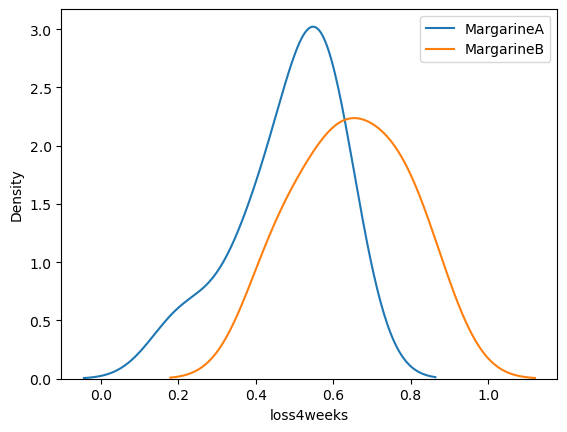

In [16]:
sns.kdeplot(df.loc[df['Margarine']=='A','loss4weeks'], label='MargarineA')
sns.kdeplot(df.loc[df['Margarine']=='B','loss4weeks'], label='MargarineB')
plt.legend()

In [17]:
ss.ttest_ind(df.loc[df['Margarine']=='A','loss4weeks'], 
             df.loc[df['Margarine']=='B','loss4weeks'],
             equal_var=True)

TtestResult(statistic=-2.5185987910477103, pvalue=0.022803946887595898, df=16.0)

In [19]:
from statsmodels.formula.api import ols #--ordinary least squares
from statsmodels.stats.anova import anova_lm #--linear model

In [22]:
formula = 'loss4weeks ~ C(Margarine)'
model = ols(formula,df).fit()
aov_table = anova_lm(model)
print(aov_table)

                df    sum_sq   mean_sq        F    PR(>F)
C(Margarine)   1.0  0.116806  0.116806  6.34334  0.022804
Residual      16.0  0.294622  0.018414      NaN       NaN


In [20]:
formula = 'loss8weeks ~ C(Margarine)'
model = ols(formula,df).fit()
aov_table = anova_lm(model)
print(aov_table)

                df    sum_sq   mean_sq         F    PR(>F)
C(Margarine)   1.0  0.121689  0.121689  4.634786  0.046933
Residual      16.0  0.420089  0.026256       NaN       NaN


Since the pr value here is 0.0469 which is less than 0.05 Hence reject the Null Hypothesis  
This means one of the Margarine brands is performing different from other

#### 2Way ANOVA

There is a weight loss program due to a diet plan.  
3Diet plans are followed, 76 people data is recorded with their weights before and after 10 weeks And their gender is also recorded.

Does the mean weight loss differ among the groups by diet plan and gender  

Ho: M1 = M2 = .... = Mn  
Ha: M1 != M2 != .... != Mn   

In [25]:
df = pd.read_csv(r"C:\Users\gjithend\Desktop\HTML_PROJECT\ALL_FOLDERS\LEARNINGS\LEARNINGS\Z_9_DS_ANOVA_diet.csv")
df.head()

,gender,Age,Height,preweight,Diet,weight6weeks
0,Female,22,159,58,1,54.2
1,Female,46,192,60,1,54.0
2,Female,55,170,64,1,63.3
3,Female,33,171,64,1,61.1
4,Female,50,170,65,1,62.2


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gender        76 non-null     object 
 1   Age           76 non-null     int64  
 2   Height        76 non-null     int64  
 3   preweight     76 non-null     int64  
 4   Diet          76 non-null     int64  
 5   weight6weeks  76 non-null     float64
dtypes: float64(1), int64(4), object(1)
memory usage: 3.7+ KB


In [28]:
df.describe(include='object')

,gender
count,76
unique,2
top,Female
freq,43


In [30]:
df['loss6weeks'] = df['preweight'] - df['weight6weeks']
df.head()

,gender,Age,Height,preweight,Diet,weight6weeks,loss6weeks
0,Female,22,159,58,1,54.2,3.8
1,Female,46,192,60,1,54.0,6.0
2,Female,55,170,64,1,63.3,0.7
3,Female,33,171,64,1,61.1,2.9
4,Female,50,170,65,1,62.2,2.8


<Axes: xlabel='loss6weeks', ylabel='gender'>

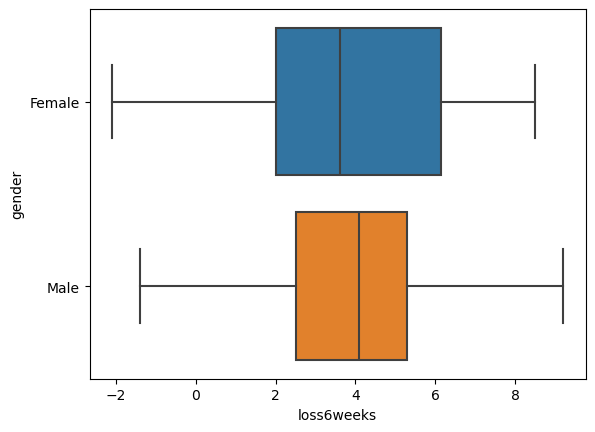

In [44]:
sns.boxplot(x='loss6weeks',y='gender',data=df)

<Axes: xlabel='Diet', ylabel='loss6weeks'>

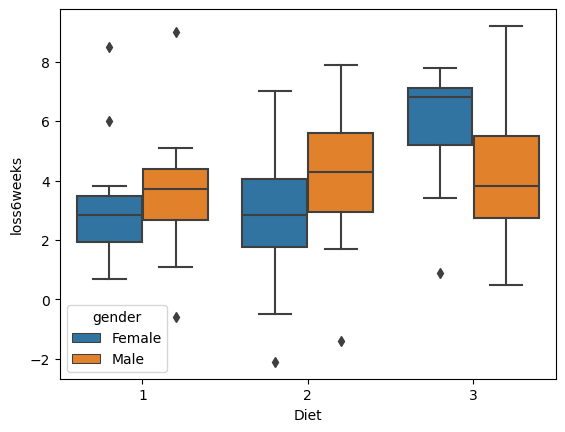

In [48]:
sns.boxplot(x='Diet',y='loss6weeks',hue='gender',data=df)

1way ANOVA

In [49]:
f = 'loss6weeks ~ C(gender)'
model = ols(f,df).fit()
aov_table = anova_lm(model)
print(aov_table)

             df      sum_sq   mean_sq         F    PR(>F)
C(gender)   1.0    0.278485  0.278485  0.043786  0.834827
Residual   74.0  470.650331  6.360140       NaN       NaN


2way ANOVA

In [51]:
f = 'loss6weeks ~ C(gender) + C(Diet)'
model = ols(f,df).fit()
aov_table = anova_lm(model)
print(aov_table)

             df      sum_sq    mean_sq         F    PR(>F)
C(gender)   1.0    0.278485   0.278485  0.048877  0.825655
C(Diet)     2.0   60.417220  30.208610  5.301912  0.007112
Residual   72.0  410.233112   5.697682       NaN       NaN


As the P value is less than 0.05 for Diet There is an effect of Diet Plan on loss of the weight, but not by gender.  
Hence reject the Null Hypothesis

Limitation of Anova:  
If either variable satisfies to reject null hypothesis it rejects the whole.

#### Tukey HSD

In [70]:
from bioinfokit.analys import stat

In [77]:
df['gender_int'] = np.where(df['gender']=='Female', 0,1)

In [75]:
f = 'loss6weeks ~ C(Diet)'
res = stat()
res.tukey_hsd(df[['Diet','loss6weeks']], res_var = 'loss6weeks', 
                  xfac_var = 'Diet',
                  anova_model = f)
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,1,2,0.032000,-1.589102,1.653102,0.066788,0.900000
1,1,3,1.848148,0.256725,3.439571,3.929262,0.018797
2,2,3,1.880148,0.305666,3.454631,4.040304,0.015193


In [76]:
df['Diet'].unique()

array([1, 2, 3], dtype=int64)

Tukey Compares each pair and calculates the P value.  
According to the above table the group3, or the Diet plan3 is showing the Significant difference from group one and two.  
Hence, Diet Plan 3 has some effect.  

In [90]:
f = 'loss6weeks ~ C(gender_int)'
res = stat()
res.tukey_hsd(df[['Diet','loss6weeks','gender_int']], res_var = 'loss6weeks', 
                  xfac_var = 'gender_int',
                  anova_model = f)
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,0,1,0.122128,-1.04081,1.285067,0.295925,0.839712


Gender has no effect on Diet

2way ANOVA

In [79]:
f = 'loss6weeks ~ C(Diet) + C(gender_int)'
res = stat()
res.tukey_hsd(df[['Diet','loss6weeks','gender_int']], res_var = 'loss6weeks', 
                  xfac_var = ['Diet','gender_int'],
                  anova_model = f)
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,"(1, 0)","(1, 1)",0.600000,-2.293523,3.493523,0.858570,0.900000
1,"(1, 0)","(2, 0)",0.442857,-2.198556,3.084270,0.694190,0.900000
2,"(1, 0)","(2, 1)",1.059091,-1.756665,3.874847,1.557362,0.870746
3,"(1, 0)","(3, 0)",2.830000,0.232983,5.427017,4.511936,0.024717
4,"(1, 0)","(3, 1)",1.183333,-1.565937,3.932604,1.782136,0.780674
5,"(1, 1)","(2, 0)",1.042857,-1.850666,3.936380,1.492276,0.896827
6,"(1, 1)","(2, 1)",0.459091,-2.594414,3.512596,0.622517,0.900000
7,"(1, 1)","(3, 0)",2.230000,-0.623052,5.083052,3.236282,0.212300
8,"(1, 1)","(3, 1)",0.583333,-2.408973,3.575640,0.807164,0.900000
9,"(2, 0)","(2, 1)",1.501948,-1.313808,4.317704,2.208570,0.609790


In [ ]:
index 0:
group1: (1, 0) - Diet Plan1, Female
group2: (1, 1) - Diet Plan1, Male

- No Sifnificance

In [86]:
res.tukey_summary.loc[res.tukey_summary['p-value']<0.05]

,group1,group2,Diff,Lower,Upper,q-value,p-value
3,"(1, 0)","(3, 0)",2.830000,0.232983,5.427017,4.511936,0.024717
10,"(2, 0)","(3, 0)",3.272857,0.675840,5.869874,5.217994,0.005583


Diet Plan 3 with Female has significant differnce

#### Chi Square Test

In [92]:
df = pd.read_csv(r"C:\Users\gjithend\Downloads\Z_9_DS_ANOVA_titanic_survival.csv")
df.head()

,Name,survived,gender,passengerClass
0,"Allen, Miss. Elisabeth Walton",yes,female,1st
1,"Allison, Master. Hudson Trevor",yes,male,1st
2,"Allison, Miss. Helen Loraine",no,female,1st
3,"Allison, Mr. Hudson Joshua Crei",no,male,1st
4,"Allison, Mrs. Hudson J C (Bessi",no,female,1st


In [93]:
ct = pd.crosstab(df.gender, df.survived)
ct

survived,no,yes
gender,,
female,127,339
male,682,161


In [94]:
chi2_contingency(ct)

Chi2ContingencyResult(statistic=363.6179084388249, pvalue=4.589924936952945e-81, dof=1, expected_freq=array([[288.00152788, 177.99847212],
       [520.99847212, 322.00152788]]))

In [96]:
chi2_contingency(ct).pvalue<0.05

True

pvalue is less than 0.05,  
So reject null hypothesis  
Variables -> gender, survived are associated  

In [97]:
ct1 = pd.crosstab(df.survived, df.passengerClass)
ct1

passengerClass,1st,2nd,3rd
survived,,,
no,123,158,528
yes,200,119,181


In [98]:
chi2_contingency(ct1)

Chi2ContingencyResult(statistic=127.85915643930328, pvalue=1.7208259588256052e-28, dof=2, expected_freq=array([[199.62337662, 171.19404125, 438.18258212],
       [123.37662338, 105.80595875, 270.81741788]]))

In [99]:
chi2_contingency(ct1).pvalue<0.05

True

pvalue is less than 0.05,  
So reject null hypothesis  
Variables -> passengerClass, survived are associated  

In [52]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   9_DS_ANOVA.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	Z_9_DS_ANOVA_diet.csv

no changes added to commit (use "git add" and/or "git commit -a")


In [53]:
!git add .

In [54]:
!git commit -m "Adding ANOVA"

[main 5346e16] Adding ANOVA
 2 files changed, 1114 insertions(+), 18 deletions(-)
 create mode 100644 Z_9_DS_ANOVA_diet.csv


In [55]:
!git push

To github.com:gali-jithendra/LEARNINGS.git
   c1625db..5346e16  main -> main
